## Step 1: Environment Setup
Import essential libraries for data analysis, visualization, and machine learning. This is the foundation of the ML pipeline, establishing the technical environment for the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

## Step 2: Data Acquisition
Load the diabetes dataset from a CSV file. Data acquisition is the first practical step in any ML project. Here we import the raw data that will be used throughout the analysis.

In [2]:
df = pd.read_csv("diabetes.csv")

## Step 3: Exploratory Data Analysis (EDA) - Initial Inspection
View the first few rows of the dataset to understand its structure. This gives us a quick overview of the data format and available features.

In [3]:
df.head(8)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# independent feature->
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
# (row, columns)
df.shape

(768, 9)

In [8]:
# distribution of outcome variable
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

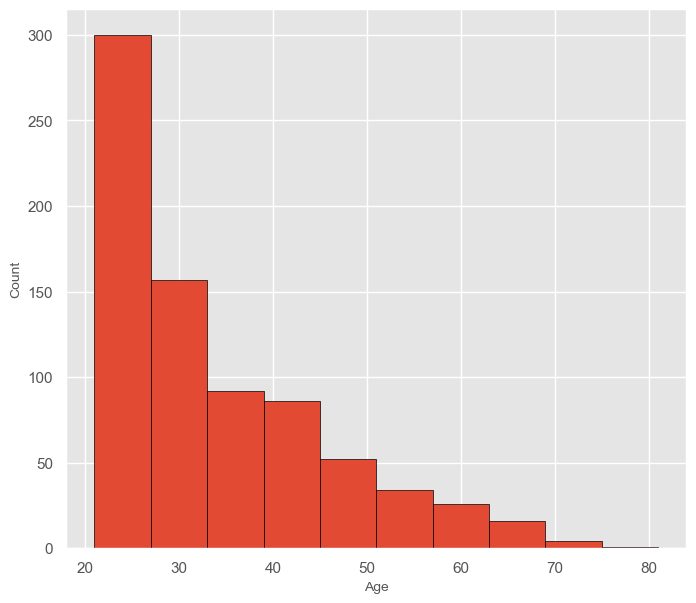

In [10]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [11]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

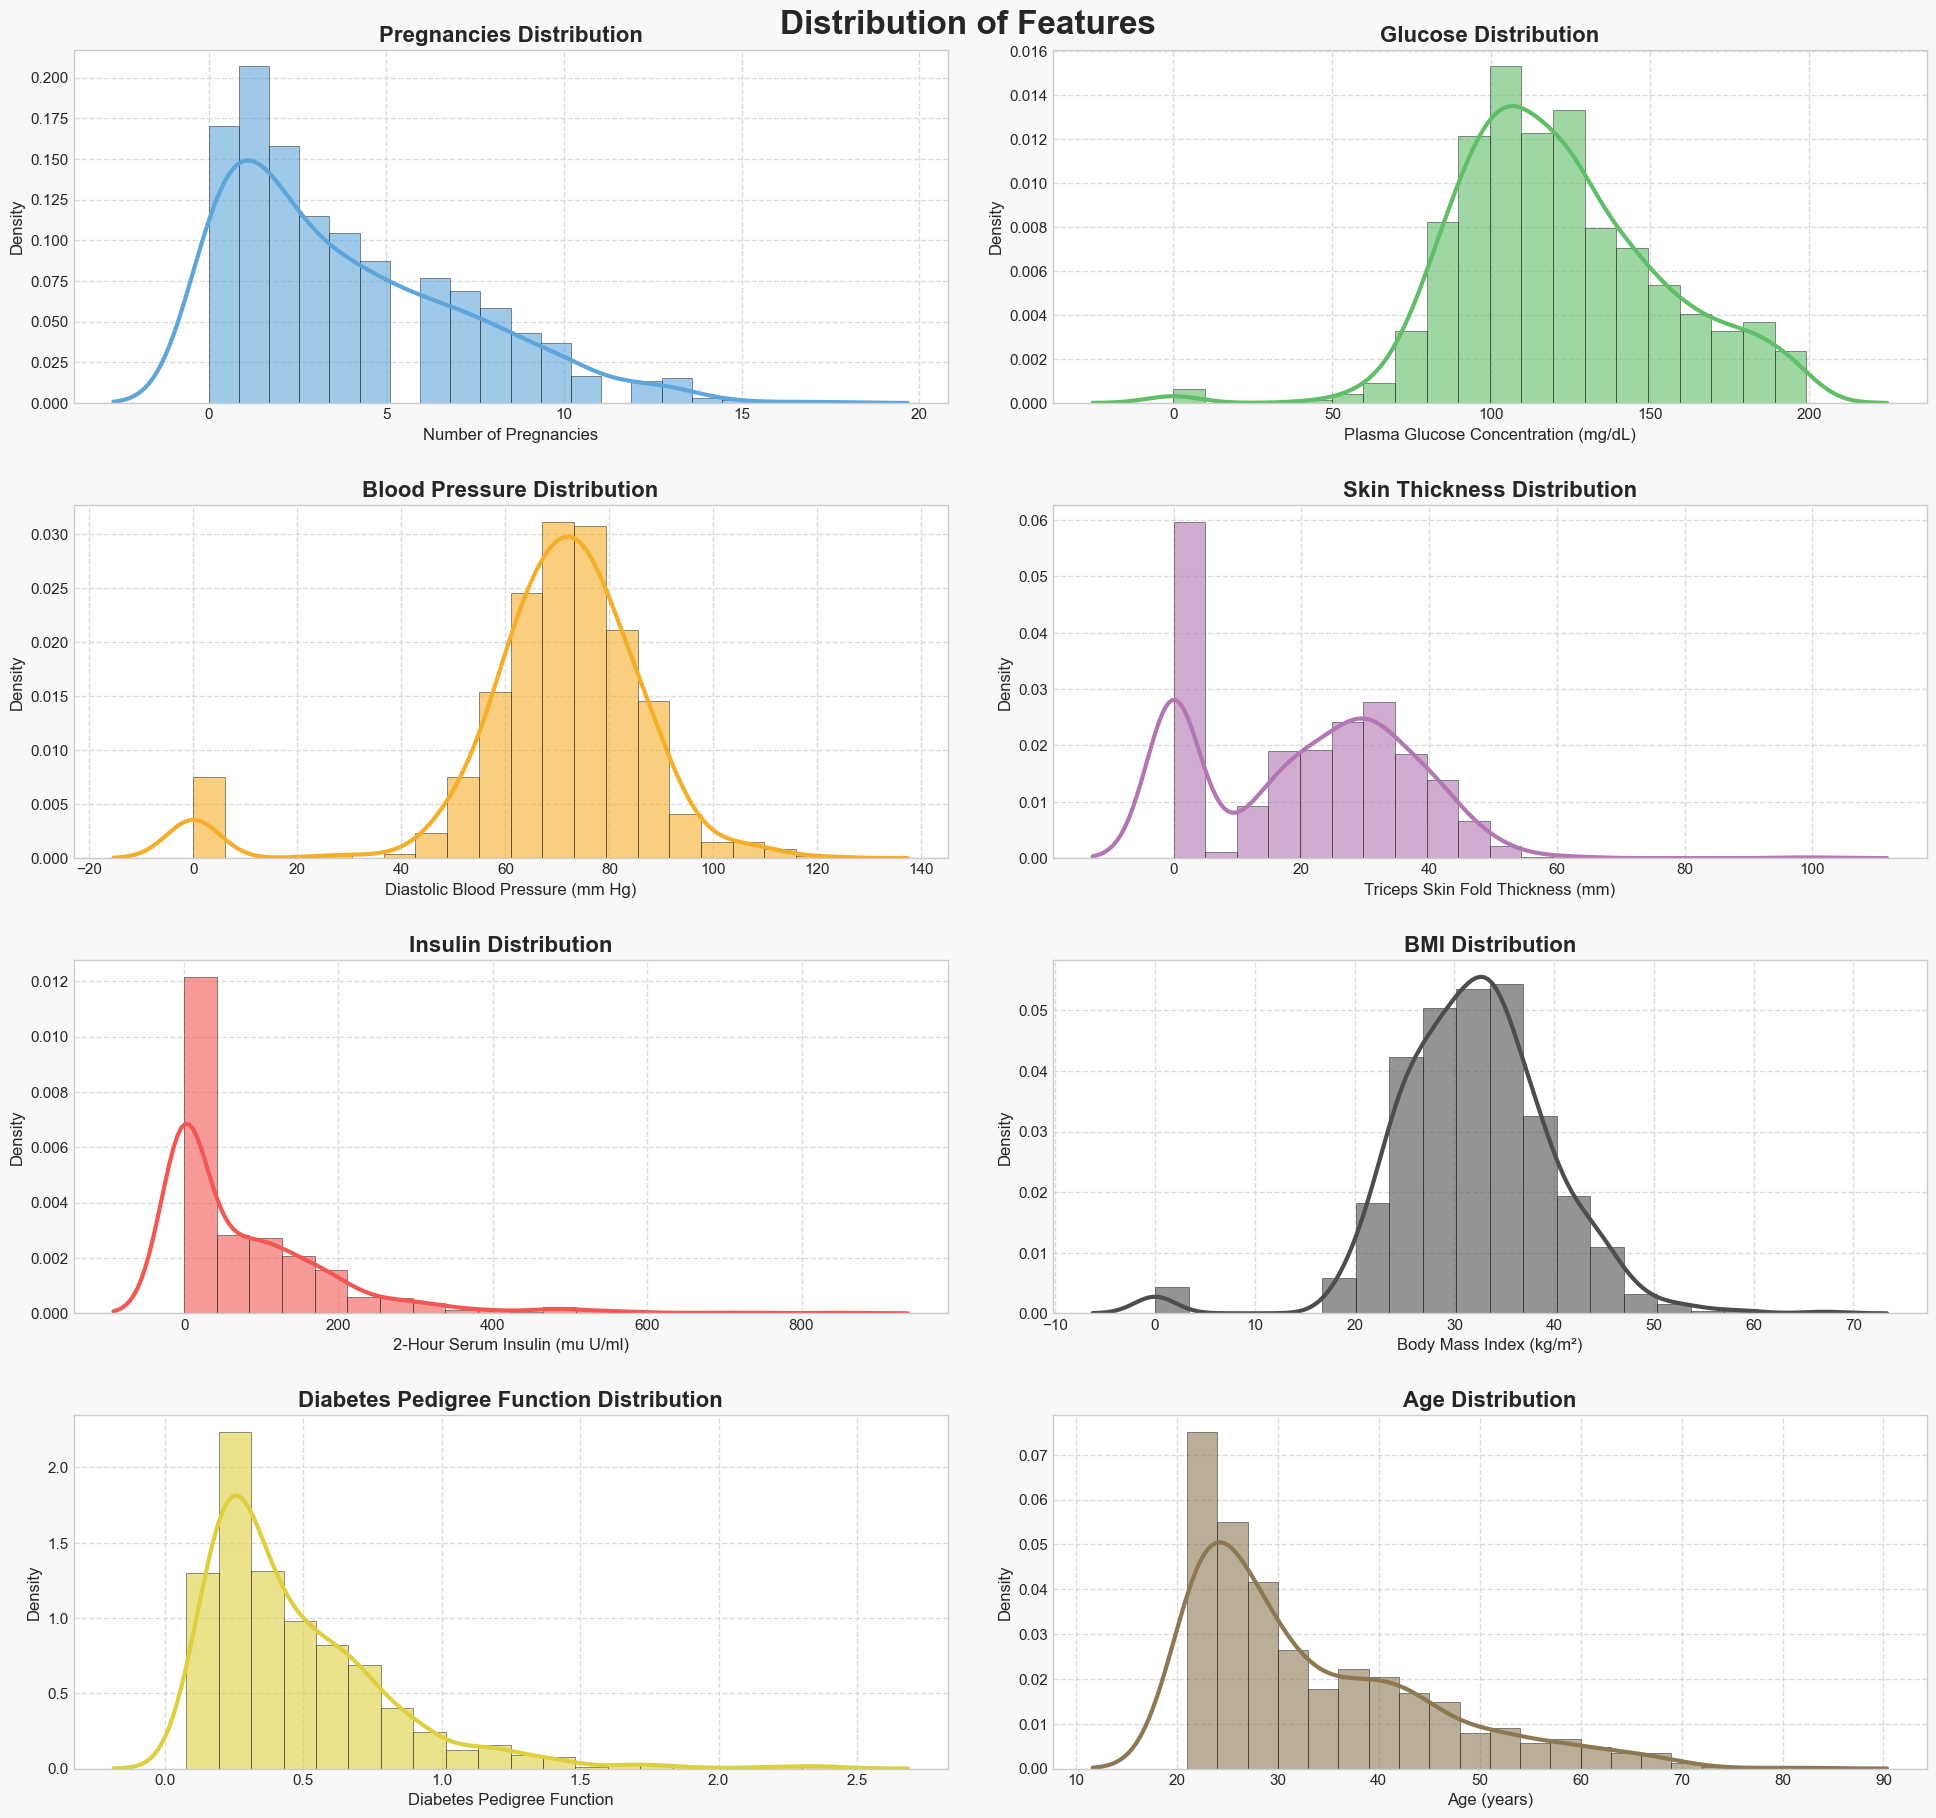

In [13]:
# Density graph for feature distributions
# 4*2=8 subplots (4 rows, 2 columns)
# Organized as:
# [0,0], [0,1] - Row 1
# [1,0], [1,1] - Row 2
# [2,0], [2,1] - Row 3
# [3,0], [3,1] - Row 4

# Set a modern, aesthetically pleasing style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a gentle color palette that is easy on the eyes
colors = ['#5DA5DA', '#60BD68', '#F5AE29', '#B276B2', 
          '#F15854', '#4D4D4D', '#DECF3F', '#8C7853']

# Create figure and subplots
fig, ax = plt.subplots(4, 2, figsize=(20, 20), facecolor='#F8F8F8')
fig.suptitle('Distribution of Features', fontsize=24, fontweight='bold', y=0.92)

# Plot distributions with improved aesthetics
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color=colors[0], 
             kde_kws={'linewidth': 3}, hist_kws={'alpha': 0.6, 'edgecolor': 'black'})
ax[0,0].set_title('Pregnancies Distribution', fontsize=16, fontweight='bold')
ax[0,0].set_xlabel('Number of Pregnancies', fontsize=12)

sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color=colors[1],
             kde_kws={'linewidth': 3}, hist_kws={'alpha': 0.6, 'edgecolor': 'black'})
ax[0,1].set_title('Glucose Distribution', fontsize=16, fontweight='bold')
ax[0,1].set_xlabel('Plasma Glucose Concentration (mg/dL)', fontsize=12)

sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color=colors[2],
             kde_kws={'linewidth': 3}, hist_kws={'alpha': 0.6, 'edgecolor': 'black'})
ax[1,0].set_title('Blood Pressure Distribution', fontsize=16, fontweight='bold')
ax[1,0].set_xlabel('Diastolic Blood Pressure (mm Hg)', fontsize=12)

sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color=colors[3],
             kde_kws={'linewidth': 3}, hist_kws={'alpha': 0.6, 'edgecolor': 'black'})
ax[1,1].set_title('Skin Thickness Distribution', fontsize=16, fontweight='bold')
ax[1,1].set_xlabel('Triceps Skin Fold Thickness (mm)', fontsize=12)

sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color=colors[4],
             kde_kws={'linewidth': 3}, hist_kws={'alpha': 0.6, 'edgecolor': 'black'})
ax[2,0].set_title('Insulin Distribution', fontsize=16, fontweight='bold')
ax[2,0].set_xlabel('2-Hour Serum Insulin (mu U/ml)', fontsize=12)

sns.distplot(df.BMI, bins=20, ax=ax[2,1], color=colors[5],
             kde_kws={'linewidth': 3}, hist_kws={'alpha': 0.6, 'edgecolor': 'black'})
ax[2,1].set_title('BMI Distribution', fontsize=16, fontweight='bold')
ax[2,1].set_xlabel('Body Mass Index (kg/m²)', fontsize=12)

sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color=colors[6],
             kde_kws={'linewidth': 3}, hist_kws={'alpha': 0.6, 'edgecolor': 'black'})
ax[3,0].set_title('Diabetes Pedigree Function Distribution', fontsize=16, fontweight='bold')
ax[3,0].set_xlabel('Diabetes Pedigree Function', fontsize=12)

sns.distplot(df.Age, bins=20, ax=ax[3,1], color=colors[7],
             kde_kws={'linewidth': 3}, hist_kws={'alpha': 0.6, 'edgecolor': 'black'})
ax[3,1].set_title('Age Distribution', fontsize=16, fontweight='bold')
ax[3,1].set_xlabel('Age (years)', fontsize=12)

# Improve overall appearance
plt.tight_layout(pad=3.0)
for i in range(4):
    for j in range(2):
        ax[i,j].grid(linestyle='--', alpha=0.7)
        for spine in ax[i,j].spines.values():
            spine.set_edgecolor('#CCCCCC')

plt.subplots_adjust(top=0.9)

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

Pregnancies
Outcome             
0           3.298000
1           4.865672

In [16]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

Pregnancies
Outcome             
0                 13
1                 17

In [17]:
df.groupby("Outcome").agg({'Glucose':'mean'})

Glucose
Outcome            
0        109.980000
1        141.257463

In [18]:
df.groupby("Outcome").agg({'Glucose':'max'})

Glucose
Outcome         
0            197
1            199

In [19]:
# Homework
# 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
#     groupby-> mean/max

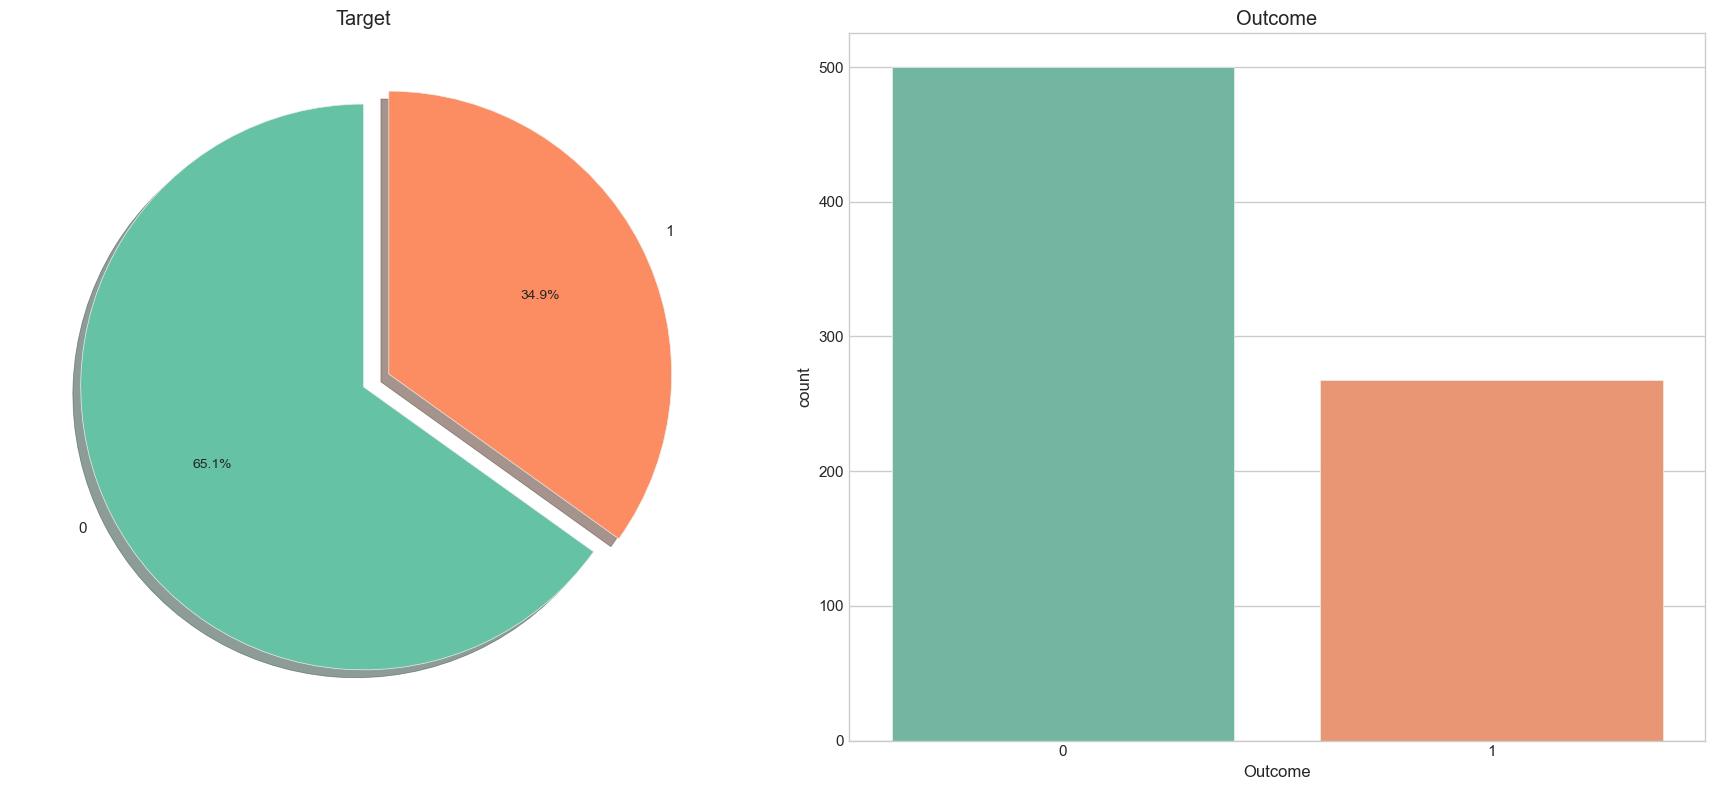

In [20]:
# 0>healthy
# 1>diabetes

colors = ['#66c2a5', '#fc8d62']  

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct="%1.1f%%",
    ax=ax[0],
    shadow=True,
    colors=colors,
    startangle=90
)
ax[0].set_title('Target')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Outcome', data=df, ax=ax[1], palette=colors)
ax[1].set_title('Outcome')

plt.tight_layout()
plt.show()


In [21]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

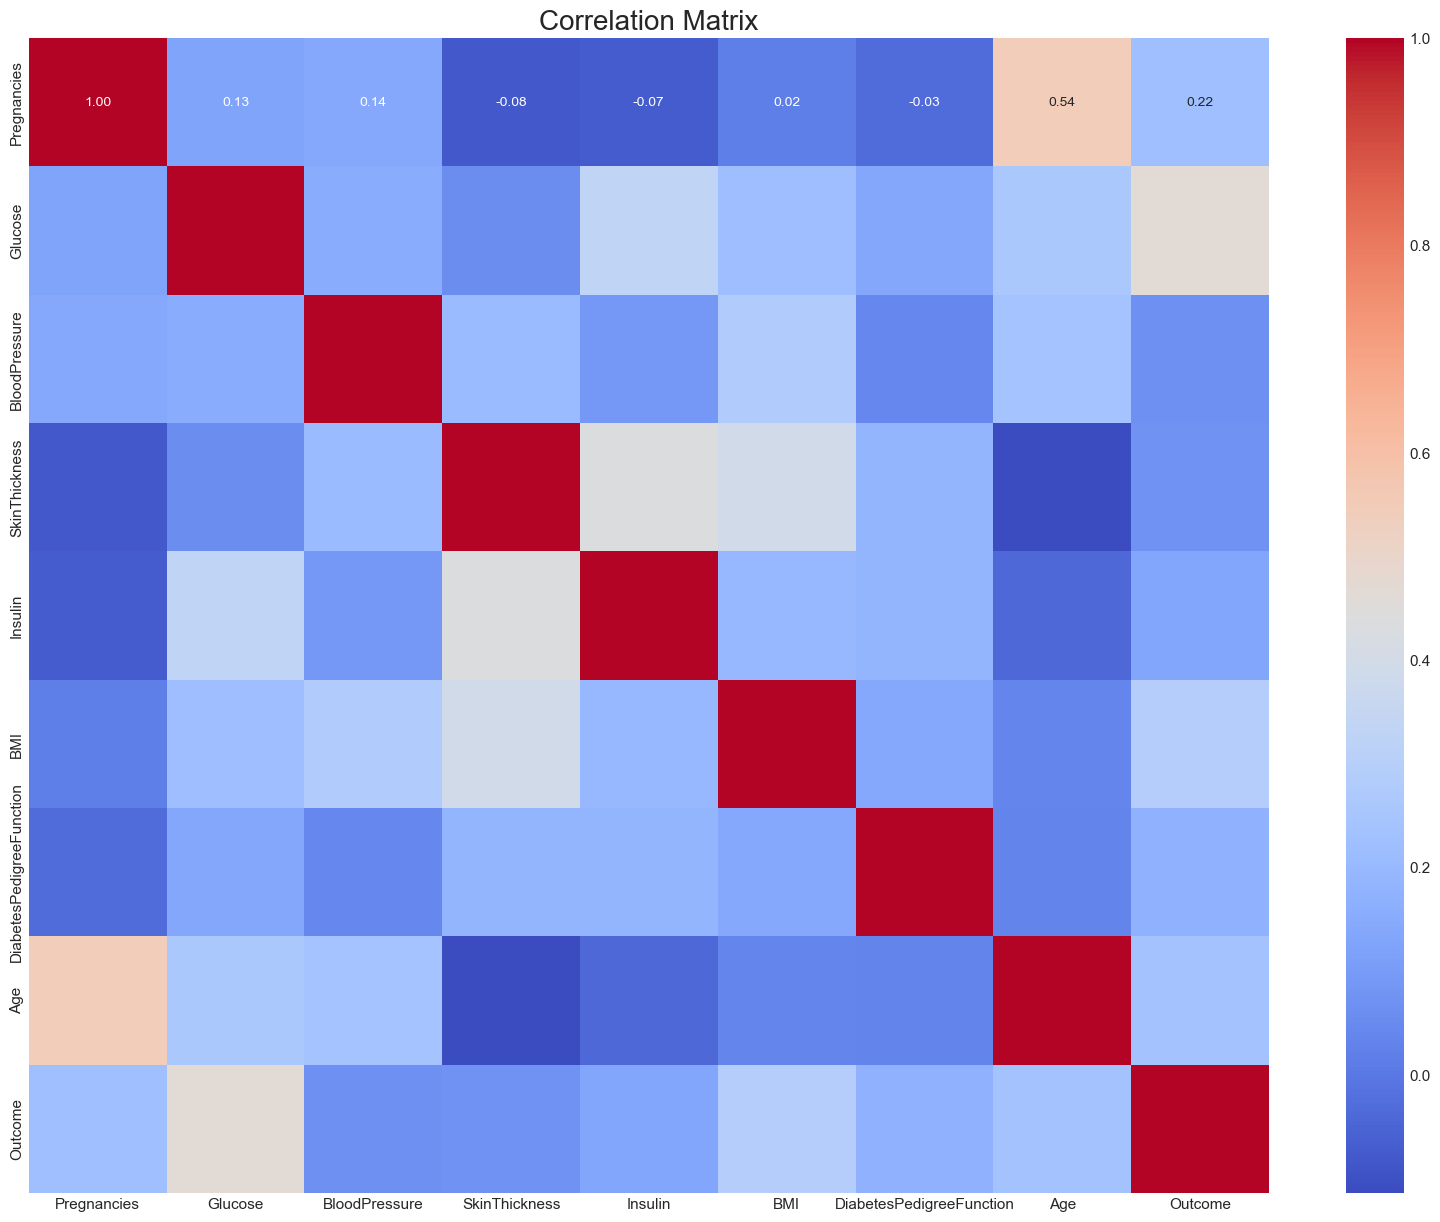

In [22]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='coolwarm')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [23]:
# EDA Part Completed
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [25]:
# Data preprocessing Part
null_counts = df.isnull().sum()
null_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [26]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

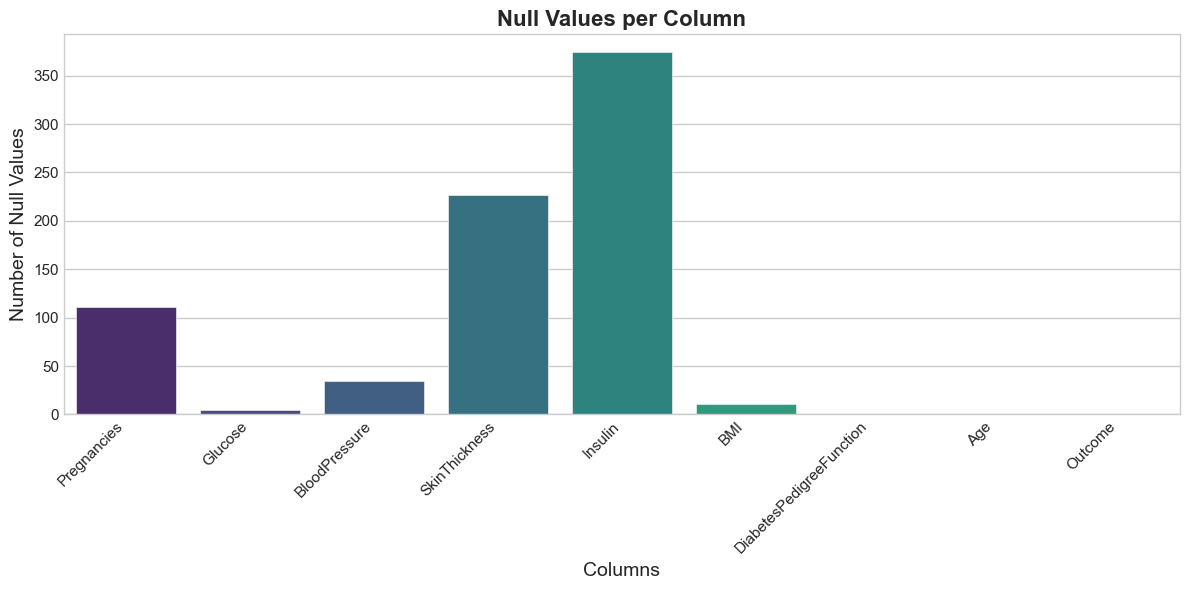

In [27]:
# Plot the missing values count

plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.title("Null Values per Column", fontsize=16, fontweight='bold')
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Number of Null Values", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [29]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [30]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Step 4: Data Preprocessing - Missing Value Imputation
Fill missing values with median values according to outcome class (target-based imputation). This is a sophisticated approach that maintains the statistical relationship between features and target. Industry standard practice for handling missing values while preserving data distributions.

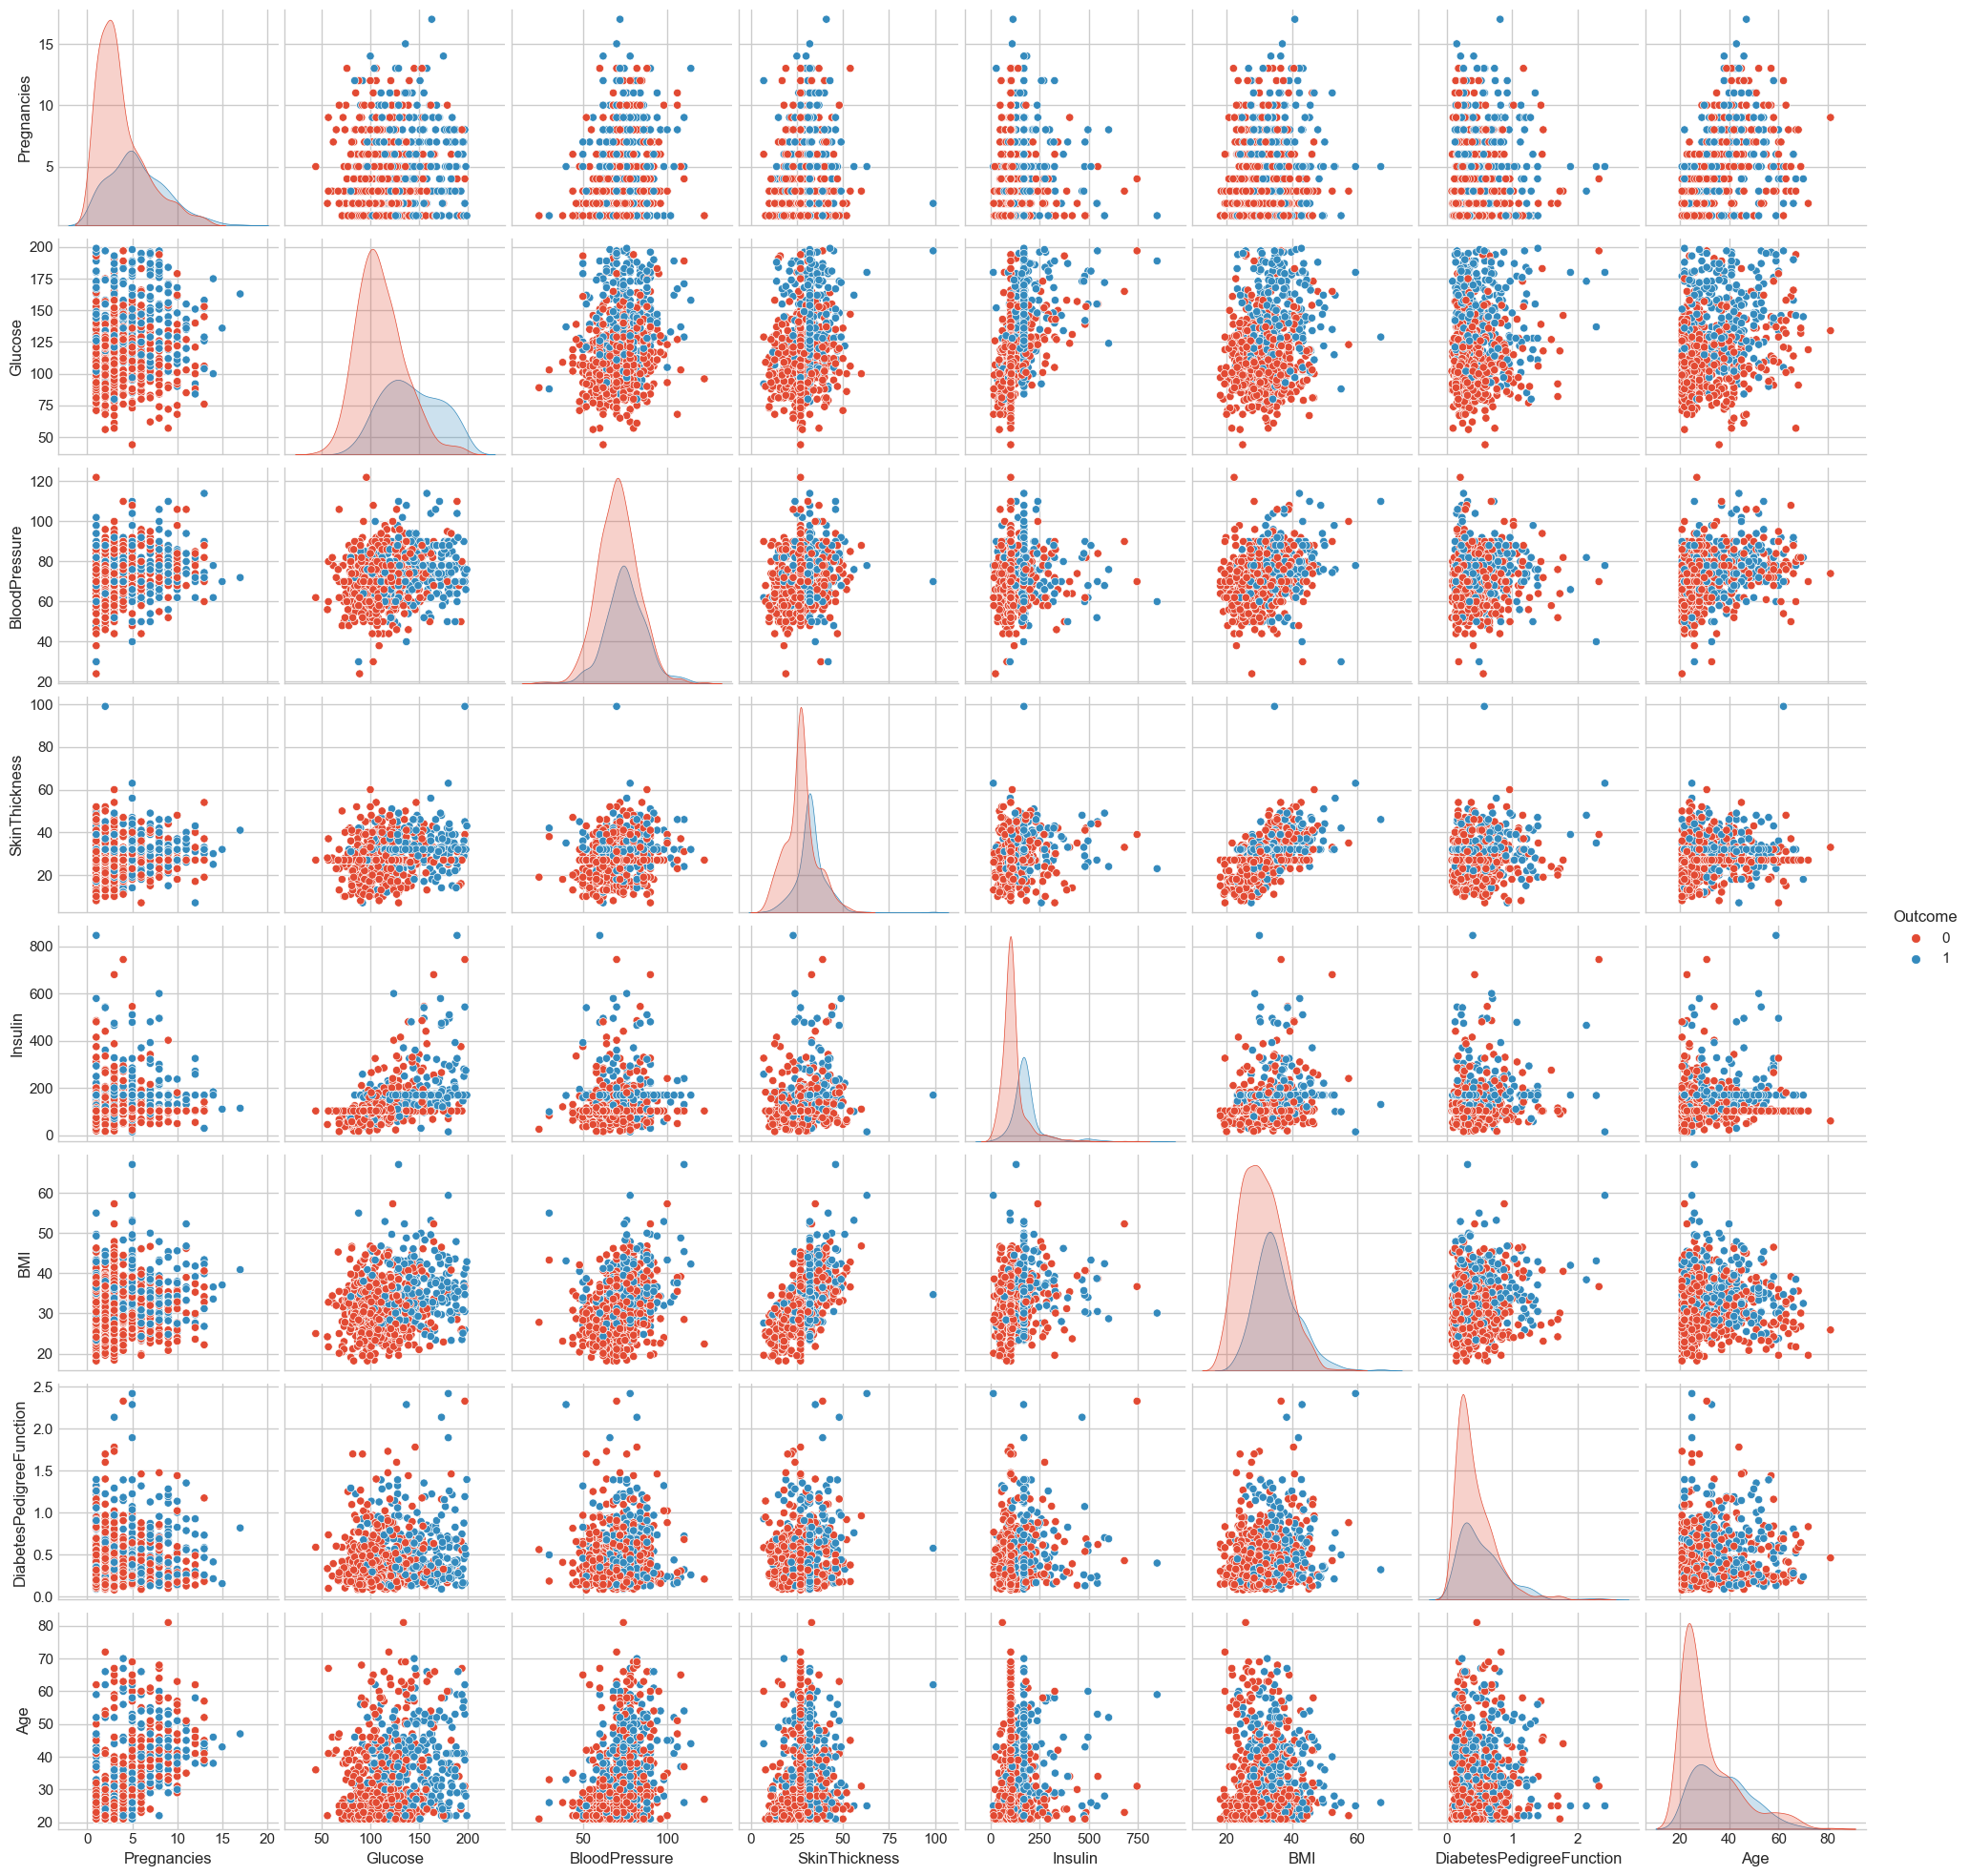

In [32]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

In [33]:
# Outlier Detection using the Interquartile Range (IQR) Method
# This code identifies features that contain outliers by:
# 1. Calculating Q1 (25th percentile) and Q3 (75th percentile) for each feature
# 2. Computing IQR = Q3 - Q1
# 3. Setting boundaries: lower = Q1 - 1.5*IQR, upper = Q3 + 1.5*IQR
# 4. Checking if any values exceed the upper boundary (are outliers)
# Note: This implementation only checks for upper outliers, not lower outliers

for feature in df:
    Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                    # Interquartile range
    lower = Q1 - 1.5*IQR             # Lower boundary for outliers
    upper = Q3 + 1.5*IQR             # Upper boundary for outliers
    
    # Check if there are any values exceeding the upper boundary
    if df[(df[feature] > upper)].any(axis=None):
        print(feature, "yes - contains upper outliers")
    else:
        print(feature, "no - no upper outliers")

Pregnancies yes - contains upper outliers
Glucose no - no upper outliers
BloodPressure yes - contains upper outliers
SkinThickness yes - contains upper outliers
Insulin yes - contains upper outliers
BMI yes - contains upper outliers
DiabetesPedigreeFunction yes - contains upper outliers
Age yes - contains upper outliers
Outcome no - no upper outliers


<Axes: xlabel='Pregnancies'>

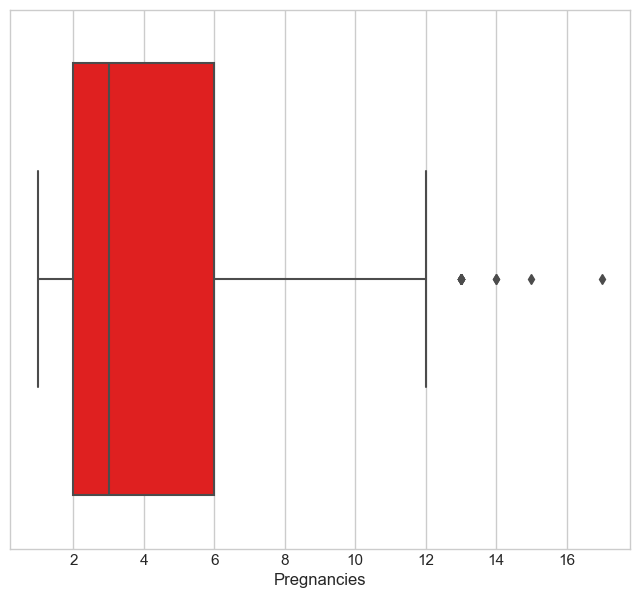

In [34]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [35]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

## Step 5: Feature Analysis - Outlier Detection
Visualize the distribution of features to identify potential outliers. Outlier detection is critical for ensuring model robustness and preventing bias. Box plots are a standard industry tool for visualizing data distributions and outliers.

<Axes: xlabel='Insulin'>

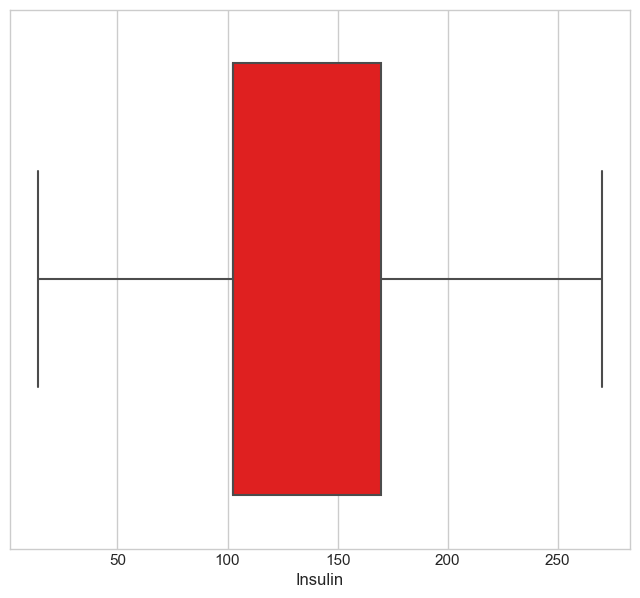

In [36]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

## Step 5.1: Outlier Detection - Local Outlier Factor (LOF)
Apply the Local Outlier Factor algorithm to detect anomalies in the dataset. LOF identifies samples that are significantly different from their neighbors, which could indicate outliers. This is an automated approach to outlier detection commonly used in industry.

In [37]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [38]:
# LOF - Local Outlier Factor
# First we need to ensure there are no missing values in our dataset
# Check if the DataFrame has any missing values
print(f"Missing values in the dataset: {df.isna().sum().sum()}")

# Option 1: Create a copy of the DataFrame without missing values
df_no_na = df.dropna()
print(f"Original shape: {df.shape}, Shape after dropping NaN: {df_no_na.shape}")

# Option 2: If too many rows would be lost, we can impute the missing values
# using either the mean, median, or a more sophisticated method

# Let's use the median for each column to fill missing values
df_imputed = df.copy()
for column in df_imputed.columns:
    if df_imputed[column].isna().sum() > 0:
        if df_imputed[column].dtype in ['float64', 'int64']:
            # For numeric columns, use median
            df_imputed[column].fillna(df_imputed[column].median(), inplace=True)
        else:
            # For categorical columns, use mode (most frequent value)
            df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)

print(f"Missing values after imputation: {df_imputed.isna().sum().sum()}")



Missing values in the dataset: 0
Original shape: (768, 9), Shape after dropping NaN: (768, 9)
Missing values after imputation: 0


In [39]:
# Now apply LocalOutlierFactor on the imputed data
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
outlier_predictions = lof.fit_predict(df_imputed)
df_scores = lof.negative_outlier_factor_

# Display the number of outliers detected
n_outliers = list(outlier_predictions).count(-1)
print(f"Number of outliers detected: {n_outliers}")

# Show some outlier scores - the more negative, the more likely to be an outlier
print("\nTop 10 most anomalous points (most negative outlier scores):")
print(np.sort(df_scores)[:10])

# Set a threshold for outlier detection based on the distribution of scores
threshold = np.percentile(df_scores, 2)  # Bottom 2% are outliers
print(f"\nOutlier threshold: {threshold}")

# Create a mask for the outliers
outlier_mask = df_scores > threshold

# Apply the mask to keep non-outliers
df_no_outliers = df_imputed[outlier_mask]
print(f"\nOriginal shape: {df_imputed.shape}, Shape after removing outliers: {df_no_outliers.shape}")

# For visualization purposes, create a column indicating outliers
df_imputed['is_outlier'] = np.where(df_scores <= threshold, 1, 0)
print(f"\nPercentage of outliers: {df_imputed['is_outlier'].mean() * 100:.2f}%")

Number of outliers detected: 25

Top 10 most anomalous points (most negative outlier scores):
[-3.06509976 -2.38250393 -2.15557018 -2.11501347 -2.08356175 -1.95386655
 -1.83559384 -1.74974237 -1.7330214  -1.71017168]

Outlier threshold: -1.610192475592765

Original shape: (768, 9), Shape after removing outliers: (752, 9)

Percentage of outliers: 2.08%


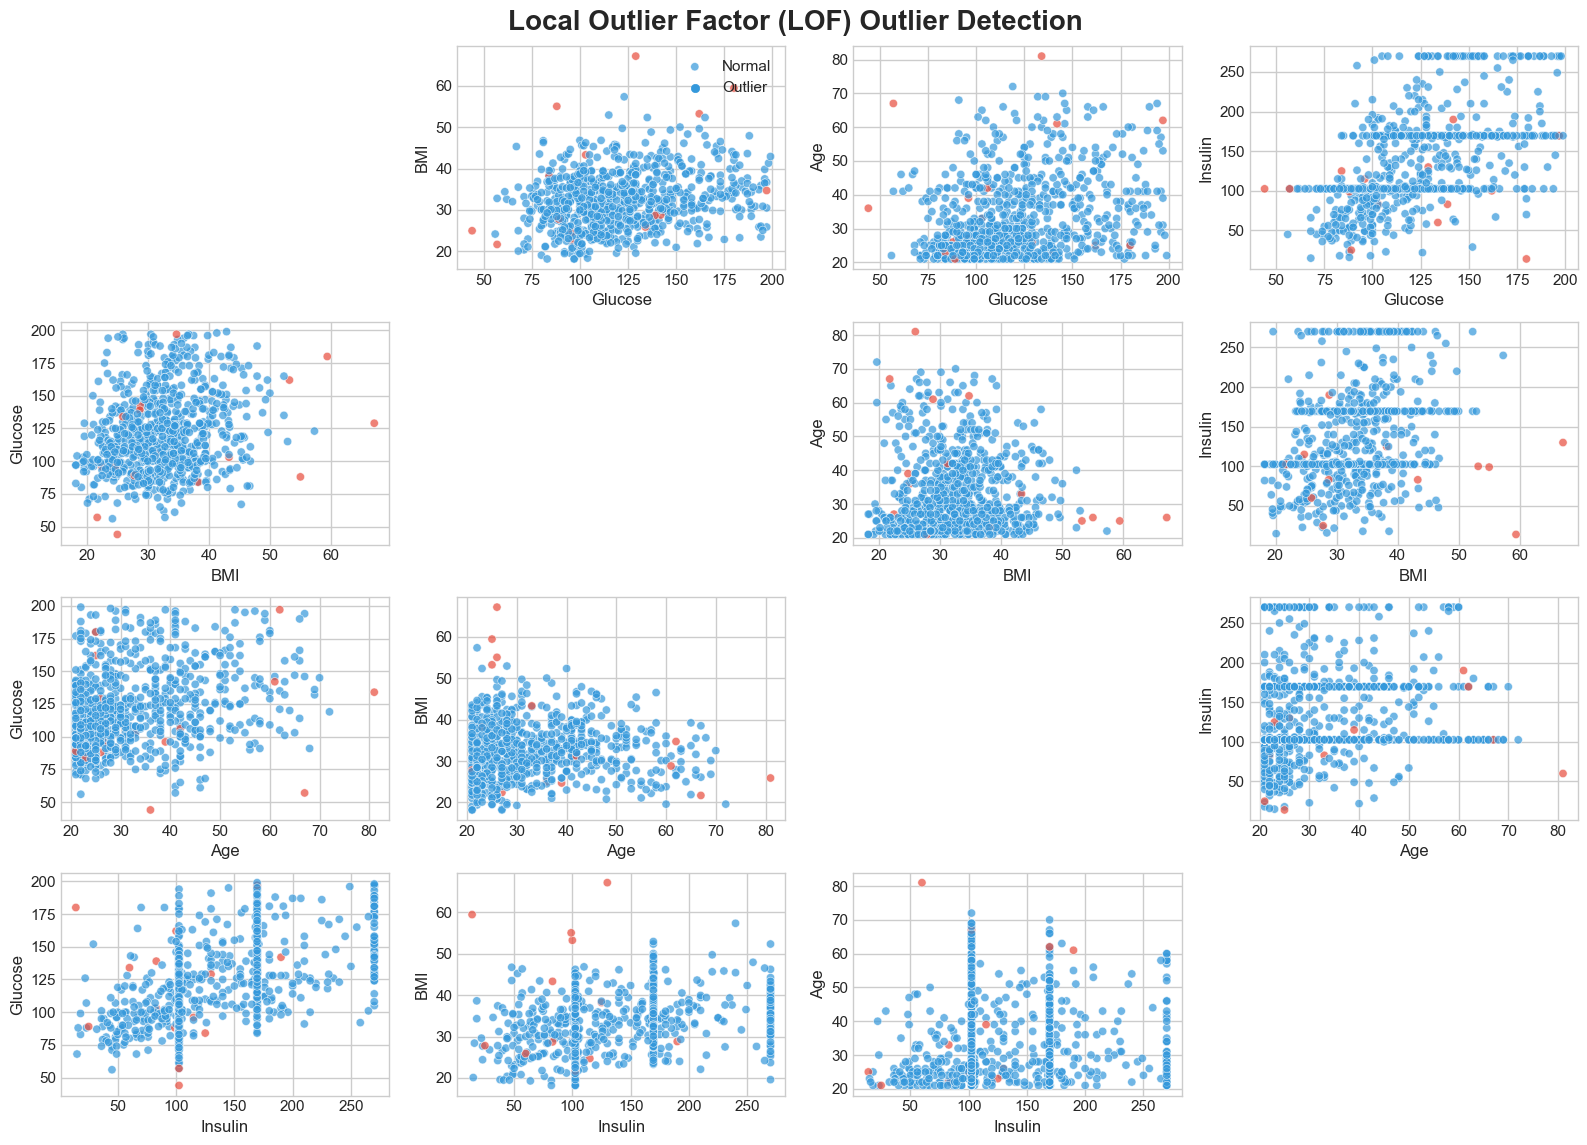

In [40]:
# Visualize the outliers detected by LOF
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization with outlier flag
df_vis = df_imputed.copy()
df_vis['outlier_score'] = df_scores

# Let's visualize outliers in a scatter plot matrix of the most important features
# Select a subset of features for visualization (too many would make it unreadable)
features_to_plot = ['Glucose', 'BMI', 'Age', 'Insulin']

# Set up the plot
plt.figure(figsize=(16, 12))
plt.suptitle('Local Outlier Factor (LOF) Outlier Detection', fontsize=20, fontweight='bold', y=0.95)

# Create a color palette for outliers vs normal points
palette = {0: '#3498db', 1: '#e74c3c'}  # Blue for normal, Red for outliers

# Create scatter plot matrix
for i, feature1 in enumerate(features_to_plot):
    for j, feature2 in enumerate(features_to_plot):
        if i != j:  # Skip diagonal
            plt.subplot(len(features_to_plot), len(features_to_plot), i * len(features_to_plot) + j + 1)
            
            # Scatter plot with color based on outlier status
            sns.scatterplot(
                x=df_vis[feature1], 
                y=df_vis[feature2], 
                hue=df_vis['is_outlier'],
                palette=palette,
                alpha=0.7
            )
            
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            
            # Remove legend from all but one plot to avoid repetition
            if i != 0 or j != 1:
                plt.legend([],[], frameon=False)
            else:
                plt.legend(['Normal', 'Outlier'], loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



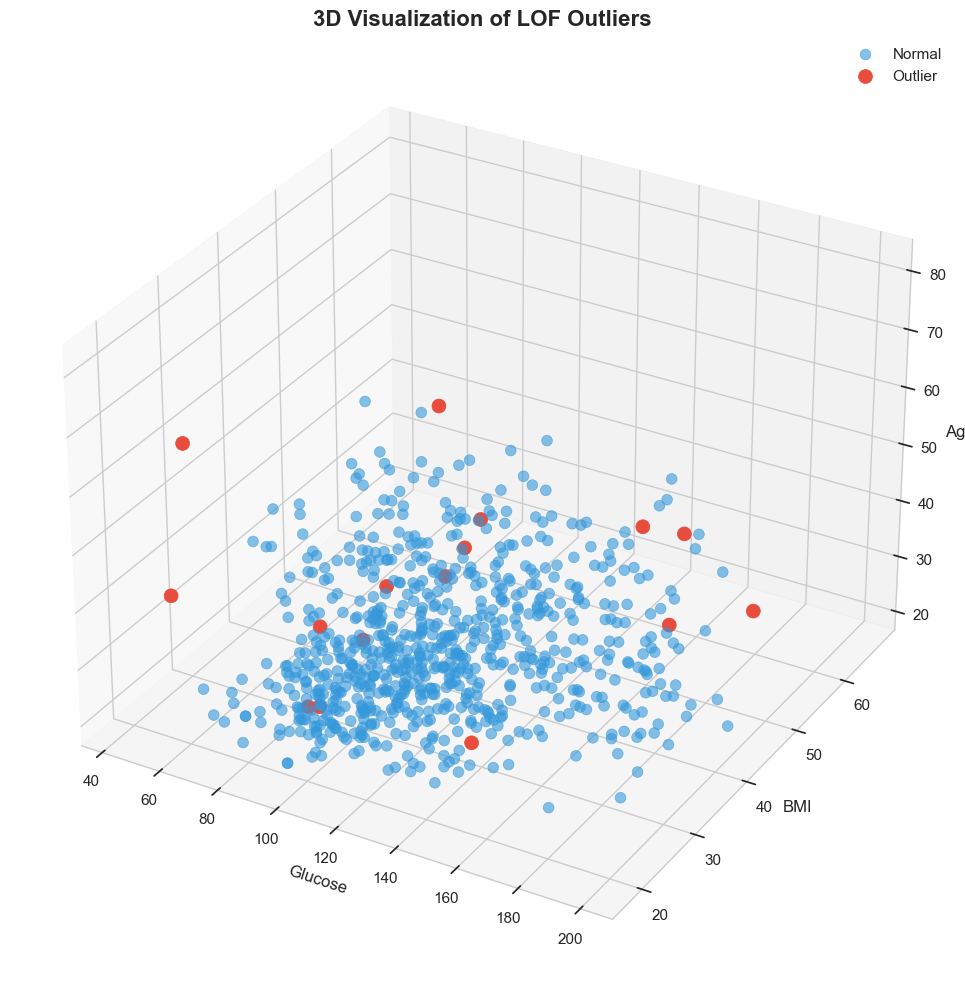

In [41]:
# Create a 3D visualization for better understanding
try:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Select three features for 3D plot
    x_feature, y_feature, z_feature = 'Glucose', 'BMI', 'Age'
    
    # Plot normal points
    normal_points = df_vis[df_vis['is_outlier'] == 0]
    ax.scatter(
        normal_points[x_feature], 
        normal_points[y_feature], 
        normal_points[z_feature], 
        c='#3498db', 
        marker='o', 
        alpha=0.6, 
        s=60, 
        label='Normal'
    )
    
    # Plot outliers
    outlier_points = df_vis[df_vis['is_outlier'] == 1]
    ax.scatter(
        outlier_points[x_feature], 
        outlier_points[y_feature], 
        outlier_points[z_feature], 
        c='#e74c3c', 
        marker='o', 
        alpha=1.0, 
        s=100, 
        label='Outlier'
    )
    
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.set_zlabel(z_feature)
    ax.set_title('3D Visualization of LOF Outliers', fontsize=16, fontweight='bold')
    
    ax.legend()
    plt.tight_layout()
    plt.show()
except ImportError:
    print("3D plotting libraries not available. Skipping 3D visualization.")

In [42]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [43]:
thresold = np.sort(df_scores)[7]

In [44]:
thresold

-1.7497423670960557

In [45]:
outlier = df_scores>thresold

In [46]:
df = df[outlier]

In [47]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [48]:
df.shape

(760, 9)

<Axes: xlabel='Pregnancies'>

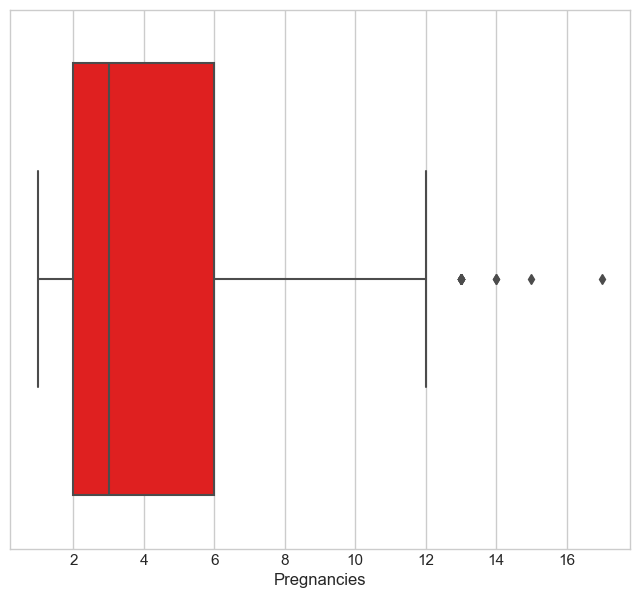

In [49]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

## Step 6: Feature Engineering
Extract and prepare categorical features for the model. Feature engineering is crucial for extracting maximum value from raw data. This transforms the data to make it more suitable for machine learning algorithms by creating meaningful representations from the original features.

In [50]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [51]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [52]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [53]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI  
0                     0.627   50        1  Obesity 2  
1                     0.351   31        0  Obesity 2  
2                     0.672   32        1  Obesity 2  
3                     0.167   21        0  Obesity 2  
4                     2.288   33        1  Obesity 3

In [54]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [55]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [56]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI NewInsulinScore  
0                     0.627   50        1  Obesity 2        Abnormal  
1                     0.351   31        0  Obesity 2          Normal  
2                     0.672   32        1  Obesity 2        Abnormal  
3                     0.167   21        0  Obesity 2          Normal  
4                     2.288   33        1  Obesity 3        Abnormal

In [57]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [58]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome     NewBMI NewInsulinScore  \
0                     0.627   50        1  Obesity 2        Abnormal   
1                     0.351   31        0  Obesity 2          Normal   
2                     0.672   32        1  Obesity 2        Abnormal   
3                     0.167   21        0  Obesity 2          Normal   
4                     2.288   33        1  Obesity 3        Abnormal   

  NewGlucose  
0     Secret  
1     Normal  
2     Secret  
3     Normal  
4     Secret

In [59]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [60]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                     0.627   50        1             False              True   
1                     0.351   31        0             False              True   
2                     0.672   32        1             False              True   
3                     0.167   21        0             False              True   
4                     2.288   33        1             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False              False               False   
1             False              False               False   
2             False              False               False   
3             False              False               False   
4              True              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False              False   
1                    True           False               True   
2                   False           False              False   
3                    True           False               True   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                  False               True  
1                  False              False  
2                  False               True  
3                  False              False  
4                  False               True

In [61]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [62]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [63]:
categorical_df.head()

NewBMI_Obesity 1  NewBMI_Obesity 2  NewBMI_Obesity 3  NewBMI_Overweight  \
0             False              True             False              False   
1             False              True             False              False   
2             False              True             False              False   
3             False              True             False              False   
4             False             False              True              False   

   NewBMI_Underweight  NewInsulinScore_Normal  NewGlucose_Low  \
0               False                   False           False   
1               False                    True           False   
2               False                   False           False   
3               False                    True           False   
4               False                   False           False   

   NewGlucose_Normal  NewGlucose_Overweight  NewGlucose_Secret  
0              False                  False               True  
1               True                  False              False  
2              False                  False               True  
3               True                  False              False  
4              False                  False               True

In [64]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [65]:
cols = X.columns
index = X.index

In [66]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

## Step 7: Feature Scaling
Apply RobustScaler to standardize features by removing median and scaling according to quantile range. This scaling method is less influenced by outliers than other scalers and is appropriate for datasets where outliers are present. Scaling is essential for algorithms sensitive to feature magnitudes.

In [67]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [68]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         0.75    0.775          0.000       1.000000  1.000000  0.177778   
1        -0.50   -0.800         -0.375       0.142857  0.000000 -0.600000   
2         1.25    1.650         -0.500       0.571429  1.000000 -0.966667   
3        -0.50   -0.700         -0.375      -0.714286 -0.126866 -0.433333   
4         0.50    0.500         -2.000       1.000000  0.977612  1.233333   

   DiabetesPedigreeFunction       Age  
0                  0.669707  1.235294  
1                 -0.049511  0.117647  
2                  0.786971  0.176471  
3                 -0.528990 -0.470588  
4                  4.998046  0.235294

In [69]:
X = pd.concat([X, categorical_df], axis=1)

In [70]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         0.75    0.775          0.000       1.000000  1.000000  0.177778   
1        -0.50   -0.800         -0.375       0.142857  0.000000 -0.600000   
2         1.25    1.650         -0.500       0.571429  1.000000 -0.966667   
3        -0.50   -0.700         -0.375      -0.714286 -0.126866 -0.433333   
4         0.50    0.500         -2.000       1.000000  0.977612  1.233333   

   DiabetesPedigreeFunction       Age  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                  0.669707  1.235294             False              True   
1                 -0.049511  0.117647             False              True   
2                  0.786971  0.176471             False              True   
3                 -0.528990 -0.470588             False              True   
4                  4.998046  0.235294             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False              False               False   
1             False              False               False   
2             False              False               False   
3             False              False               False   
4              True              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False              False   
1                    True           False               True   
2                   False           False              False   
3                    True           False               True   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                  False               True  
1                  False              False  
2                  False               True  
3                  False              False  
4                  False               True

## Step 8: Data Splitting - Training and Test Sets
Split the dataset into training (80%) and testing (20%) sets. This industry-standard practice allows for model training and unbiased evaluation. Setting random_state ensures reproducibility of results.

In [71]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [72]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Machine Learning Algo

## Step 9: Model Development and Evaluation
In this phase, we'll implement and evaluate several machine learning algorithms to identify the most effective model for diabetes prediction. Each model will be trained on the training data and evaluated using multiple performance metrics.

### Step 9.1: Logistic Regression
Logistic Regression is a fundamental classification algorithm that models the probability of a binary outcome. It's often used as a baseline model due to its simplicity, interpretability, and effectiveness for many classification tasks.

In [74]:
# Logistic Regreesion

In [75]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred = log_reg.predict(X_test)

In [77]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8470394736842105

In [78]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [79]:
confusion_matrix(y_test, y_pred)

array([[88, 10],
       [ 6, 48]], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        98
           1       0.83      0.89      0.86        54

    accuracy                           0.89       152
   macro avg       0.88      0.89      0.89       152
weighted avg       0.90      0.89      0.90       152



### Step 9.2: K-Nearest Neighbors (KNN)
KNN is a non-parametric, instance-based learning algorithm that classifies data points based on similarity measures. It's intuitive and effective for many classification problems, especially when the decision boundary is irregular.

In [81]:
# Model Training and Evaluation - KNN
# Train the KNN model on training data and evaluate on both training and test sets
# Comprehensive evaluation includes accuracy metrics and detailed classification report
# This follows industry standard practices for model performance assessment

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.875
0.881578947368421
[[88 10]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        98
           1       0.82      0.85      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



In [82]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [83]:
# best_parameter
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [84]:
grid_search.best_score_

0.8618208914781196

### Step 9.3: Support Vector Classifier (SVC)
Support Vector Machine is a powerful classification algorithm that finds the hyperplane that best separates classes with the maximum margin. SVC is particularly effective in high-dimensional spaces and when the decision boundary is complex.

In [85]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.875
0.9078947368421053
[[90  8]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.86      0.89      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



### Step 9.4: Decision Tree


In [86]:
# Decision Tree

In [87]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8552631578947368
[[84 14]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        98
           1       0.77      0.85      0.81        54

    accuracy                           0.86       152
   macro avg       0.84      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



## Step 10: Hyperparameter Optimization - Grid Search
Systematically search through multiple hyperparameter combinations to find optimal model settings. Grid search with cross-validation is an industry standard approach for hyperparameter tuning. This comprehensive search helps avoid overfitting and improves model generalization.

In [88]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [89]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'splitter': 'best'}

In [90]:
grid_search_dt.best_score_

0.8712820512820514

In [91]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.899671052631579
0.8289473684210527
[[84 14]
 [12 42]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.75      0.78      0.76        54

    accuracy                           0.83       152
   macro avg       0.81      0.82      0.81       152
weighted avg       0.83      0.83      0.83       152



In [92]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [93]:
y_pred = rand_clf.predict(X_test)

In [94]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9884868421052632
0.9144736842105263
[[91  7]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.87      0.89      0.88        54

    accuracy                           0.91       152
   macro avg       0.91      0.91      0.91       152
weighted avg       0.91      0.91      0.91       152



## Step 11: Advanced Modeling - Gradient Boosting Classifier
Gradient Boosting is an ensemble method that builds models sequentially to correct errors of previous ones. We use Grid Search optimization to find the best combination of hyperparameters. Ensemble methods are industry standard for achieving high performance in classification tasks.

In [95]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [96]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [97]:
grid_search_gbc.best_score_

0.8896721311475411

In [98]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [99]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9983552631578947
0.9144736842105263
[[91  7]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.87      0.89      0.88        54

    accuracy                           0.91       152
   macro avg       0.91      0.91      0.91       152
weighted avg       0.91      0.91      0.91       152



## Step 12: State-of-the-Art Modeling - XGBoost
XGBoost is an industry-leading gradient boosting framework known for performance and efficiency. It uses optimized hyperparameters based on domain knowledge and previous experiments. XGBoost is widely used in production ML systems and Kaggle competitions for its excellent results.

In [100]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9736842105263158
0.881578947368421
[[89  9]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        98
           1       0.83      0.83      0.83        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



In [102]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
4      Random Forest Classifier  91.45
5  Gradient Boosting Classifier  91.45
2                           SVM  90.79
0           Logistic Regression  89.47
1                           KNN  88.16
6                       XgBoost  88.16
3      Decision Tree Classifier  82.89

In [103]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

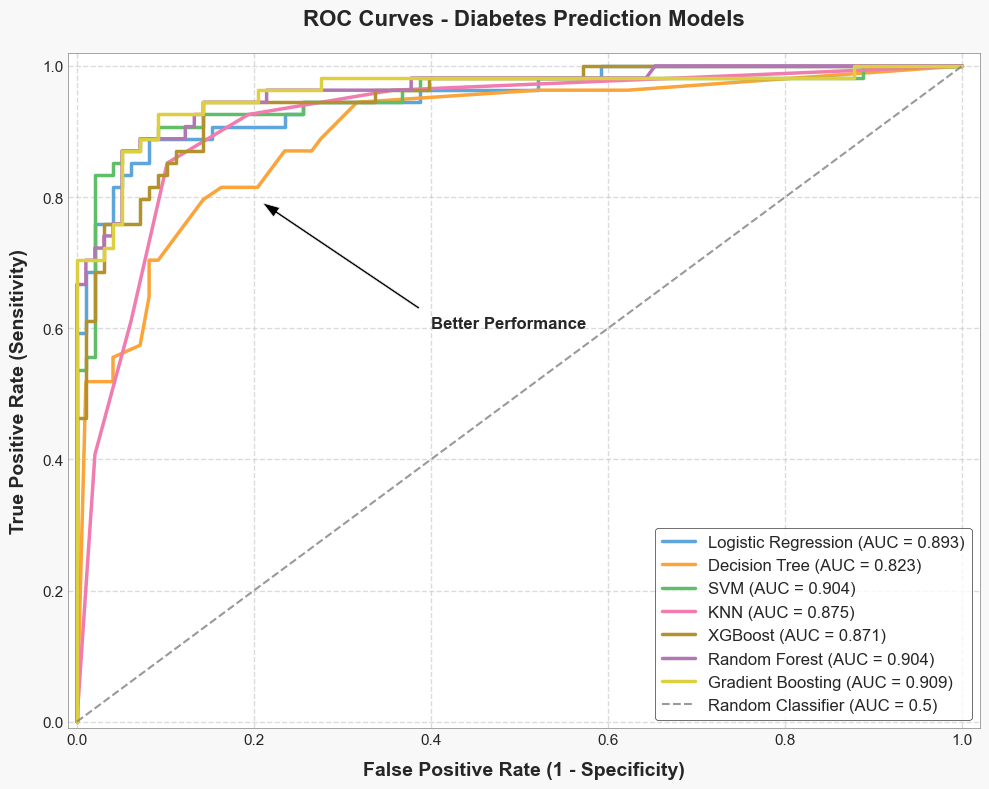

In [104]:
from sklearn import metrics

# Set a visually appealing color palette
colors = ['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0', '#B2912F', '#B276B2', '#DECF3F']

models = [
{
    'label': 'Logistic Regression',
    'model': log_reg,
},
{
    'label': 'Decision Tree',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'Random Forest',
    'model': rand_clf,
},
{
    'label': 'Gradient Boosting',
    'model': gbc,
}
]

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,8), facecolor='#F8F8F8')
plt.grid(linestyle='--', alpha=0.7)

for i, m in enumerate(models):
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s (AUC = %0.3f)' % (m['label'], auc), 
             linewidth=2.5, color=colors[i])

# Add reference line
plt.plot([0, 1], [0, 1], '--', color='gray', alpha=0.8, linewidth=1.5, 
         label='Random Classifier (AUC = 0.5)')

# Customize plot appearance
plt.xlim([-0.01, 1.02])
plt.ylim([-0.01, 1.02])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold', labelpad=10)
plt.title('ROC Curves - Diabetes Prediction Models', fontsize=16, fontweight='bold', pad=20)

# Improve legend
plt.legend(loc="lower right", fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Add a subtle box around the plot
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(0.5)

# Add extra annotations
plt.annotate('Better Performance', xy=(0.2, 0.8), xytext=(0.4, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig("ROC_Curves_Diabetes_Prediction_Models.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [105]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                     0.627   50        1             False              True   
1                     0.351   31        0             False              True   
2                     0.672   32        1             False              True   
3                     0.167   21        0             False              True   
4                     2.288   33        1             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False              False               False   
1             False              False               False   
2             False              False               False   
3             False              False               False   
4              True              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False              False   
1                    True           False               True   
2                   False           False              False   
3                    True           False               True   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                  False               True  
1                  False              False  
2                  False               True  
3                  False              False  
4                  False               True

In [106]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                     0.627   50        1             False              True   
1                     0.351   31        0             False              True   
2                     0.672   32        1             False              True   
3                     0.167   21        0             False              True   
4                     2.288   33        1             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0             False              False               False   
1             False              False               False   
2             False              False               False   
3             False              False               False   
4              True              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False              False   
1                    True           False               True   
2                   False           False              False   
3                    True           False               True   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                  False               True  
1                  False              False  
2                  False               True  
3                  False              False  
4                  False               True

## Step 13: Model Comparison and Visualization
Comprehensive performance comparison of all implemented models using accuracy and ROC metrics. Visual representation helps in identifying the best-performing model. This step is crucial for model selection in production environments and provides transparency in the decision-making process.

[89.47, 82.89, 90.79, 88.16000000000001, 88.16000000000001, 91.45, 91.45]
[89.34, 80.91000000000001, 90.36, 87.49, 87.07000000000001, 89.85, 90.86999999999999]


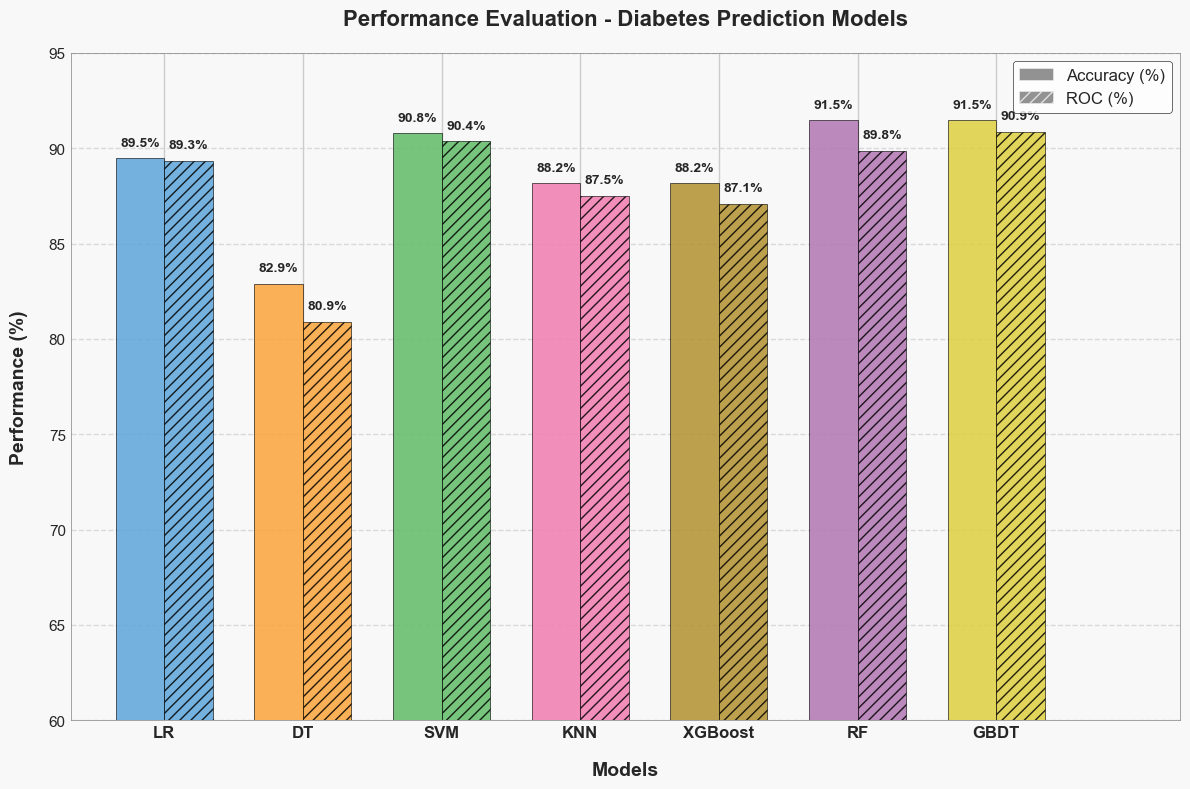

In [107]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Set a custom color palette for the models
model_colors = ['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0', '#B2912F', '#B276B2', '#DECF3F']

models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Enable a grid for better readability
plt.rcParams['axes.grid'] = True

# Set a better style
plt.style.use('seaborn-v0_8-whitegrid')

# create plot with improved aesthetics
fig, ax = plt.subplots(figsize=(12,8))
fig.patch.set_facecolor('#F8F8F8')
ax.set_facecolor('#F8F8F8')

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.85

# Add a subtle shadow effect
for i, v in enumerate(means_accuracy):
    rects1 = plt.bar(index[i], v, bar_width,
                    alpha=opacity,
                    color=model_colors[i],
                    label='Accuracy (%)' if i == 0 else "",
                    edgecolor='black',
                    linewidth=0.5)
    
    # Add value labels on top of each bar
    plt.text(index[i], v + 0.5, f'{v:.1f}%', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

for i, v in enumerate(means_roc):
    rects2 = plt.bar(index[i] + bar_width, v, bar_width,
                    alpha=opacity,
                    color=model_colors[i],
                    hatch='///',
                    label='ROC (%)' if i == 0 else "",
                    edgecolor='black',
                    linewidth=0.5)
    
    # Add value labels on top of each bar
    plt.text(index[i] + bar_width, v + 0.5, f'{v:.1f}%', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlim([-0.5, 7.5])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction Models', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Models', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Performance (%)', fontsize=14, fontweight='bold', labelpad=15)

plt.xticks(index + bar_width/2, ('LR', 'DT', 'SVM', 'KNN', 'XGBoost', 'RF', 'GBDT'), 
           rotation=0, ha='center', fontsize=12, fontweight='bold')

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gray', alpha=opacity, label='Accuracy (%)'),
    Patch(facecolor='gray', alpha=opacity, hatch='///', label='ROC (%)')
]
plt.legend(handles=legend_elements, loc="upper right", fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a subtle box around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(0.5)

plt.tight_layout()
plt.savefig("Performace_Diabetes_Prediction_Models.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

## Step 14: Conclusion and Next Steps
Based on the performance comparison, we can identify the most effective model for diabetes prediction. In a production environment, this model would be selected for deployment after additional validation steps. 

Possible next steps include:
1. Model deployment to a production environment
2. Development of a monitoring system for model performance
3. Implementation of a feedback loop for continuous improvement
4. Exploration of additional features or data sources to enhance prediction accuracy